In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=25

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 2]


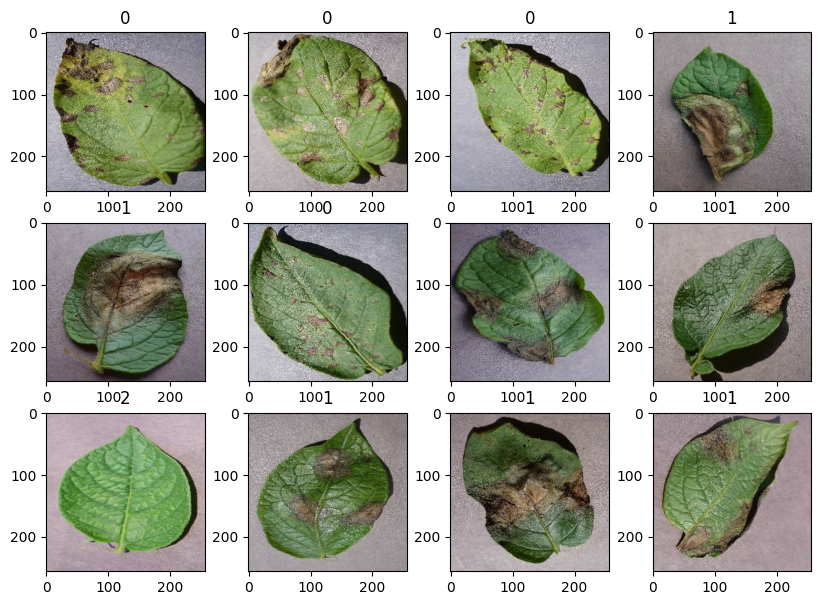

In [7]:
#================Image Visualization==============
plt.figure(figsize=(10,7))
for image_batch,label_batch in dataset.take(1):
    
    for i in range(12):
        
        ax=plt.subplot(3,4,i+1)
        plt.title(label_batch[i].numpy())
        plt.imshow(image_batch[i].numpy().astype("uint8"))

In [8]:
# 80% ==> training
# 20% ==> 10% validation , 10% test


In [9]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [10]:
train_ds=dataset.take(54)
test_ds=dataset.skip(54)

In [11]:
print(len(train_ds),len(test_ds))

54 14


In [12]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [13]:
val_ds=test_ds.take(6)
test_ds=test_ds.skip(6)

In [14]:
print(len(val_ds),len(test_ds))


6 8


In [15]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    
    train_size=int(ds_size*train_split)
    val_size=int(ds_size*val_split)
    val_ds=ds.skip(train_size).take(val_size)
    train_ds=ds.take(train_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,test_ds,val_ds    

In [16]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [17]:
print(len(train_ds),len(test_ds),len(val_ds))

54 6 8


In [18]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [19]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)    
])

In [20]:
#==============Flipped and Rotated images==============
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [21]:
#========== Building The CNN model ===============
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3

model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation="relu",input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(n_classes,activation="softmax")    
])

model.build(input_shape=input_shape)

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [23]:
model.compile(optimizer="adam",
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=["accuracy"]
)

In [24]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/25


 6/54 [==>...........................] - ETA: 54s - loss: 0.9603 - accuracy: 0.4531

KeyboardInterrupt: 

In [ ]:
scores=model.evaluate(test_ds)

In [ ]:
scores

In [ ]:
history

In [ ]:
history.params

In [ ]:
history.history.keys()

In [ ]:
loss=history.history["loss"]
val_loss=history.history["val_loss"]

val_acc=history.history["val_accuracy"]
acc=history.history["accuracy"]

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label="Tarining Accuracy")
plt.plot(range(EPOCHS),val_acc,label="Validating Accuracy")
plt.legend(loc="lower right")
plt.title("Training and validation accuracy")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label="Tarining Loss")
plt.plot(range(EPOCHS),val_loss,label="Validating Loss")
plt.legend(loc="upper right")
plt.title("Training and validation Loss")

In [ ]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype("uint8")
    first_label=labels_batch[0].numpy()
    print("First image to predict")
    plt.imshow(first_image)
    print("actual label : ",class_names[first_label])

    batch_prediction=model.predict(images_batch)
    print("predicted label : ",class_names[np.argmax(batch_prediction[0])])


In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.axis("off")
        # plt.title(])
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_labels=class_names[labels[i].numpy()]
        plt.title(f"Predicted label : {predicted_class}\nActual label : {actual_labels}\nConfidence : {confidence}")
        plt.imshow(images[i].numpy().astype("uint8"))      

In [ ]:
# import os
# parent_dir=os.getcwd()
# model_version=1

In [ ]:
# model_dir=os.path.join(parent_dir,"models")
# save_dir=os.path.join(model_dir,str(model_version))
# model_version=int(model_version)
# os.makedirs(save_dir,exist_ok=True)
# model.save(save_dir)
# model_version+=1